# SI 618: Data Manipulation and Analysis
## 06 - Categorical Data & Text Processing 
### Contingency tables, crosstabs, mosaic plots and chi-squared
### Introduction to text processing
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.</small>
    
### Please ensure you have this version:
Version 2022.02.13.1.CT


# Categorical Data

Categorical data are those that can take on one of a limited number of values (i.e. categories) (Wikipedia)

Examples: blood type (A, B, AB, O); types of rock (sedimentary, metamorphic, igneous).

## Contingency tables, crosstabs, and chi-square

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Let's generate a data frame to play with:

In [2]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [3]:
df

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car
5,green,dodge,truck
6,green,ford,suv
7,black,toyota,suv
8,red,dodge,suv
9,green,ford,car


In [4]:
df.shape

(24, 3)

One of the most basic transformations we can do is a crosstab:

In [5]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


Notice how similar it is to pivoting.  In fact, go ahead and use ```pivot_table``` to do the same sort of transformation:

### <font color="magenta">Q1: Use ```pivot_table``` to create a DataFrame similar to the one from the ```crosstab``` above:

In [13]:
df.pivot_table(index='color', columns='vehicleClass', aggfunc=len, fill_value=0)

make          
vehicleClass  car suv truck
color                      
black           2   2     2
green           4   6     2
red             2   4     0

As usual, we would like to visualize our results:

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='vehicleClass', ylabel='color'>

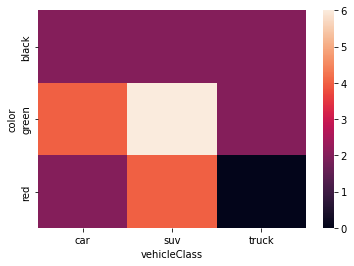

In [15]:
sns.heatmap(ct,annot=False)

<AxesSubplot:xlabel='vehicleClass', ylabel='color'>

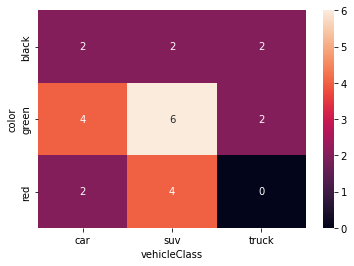

In [16]:
sns.heatmap(ct,annot=True)

You might want to investigate other palettes, see https://seaborn.pydata.org/tutorial/color_palettes.html for more details.



<AxesSubplot:xlabel='vehicleClass', ylabel='color'>

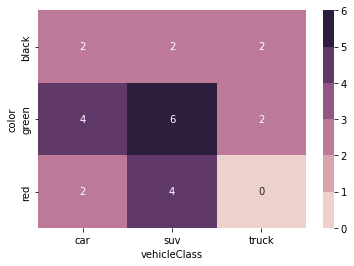

In [17]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette())

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [18]:
titanic = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/titanic.csv')

In [19]:
titanic.sample(5)

,passtype,age,status,sex
412,third,adult,dead,male
1997,first,adult,alive,female
439,third,adult,dead,male
825,crew,adult,dead,male
899,crew,adult,dead,male


Let's create a crosstab of the data:

In [20]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=False)
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


<AxesSubplot:xlabel='status', ylabel='passtype'>

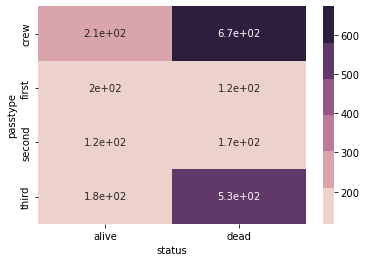

In [21]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette())

Does scientific notation bother you?  Change the format with the ```fmt=``` argument:

<AxesSubplot:xlabel='status', ylabel='passtype'>

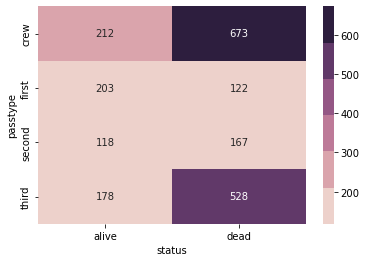

In [22]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(),fmt='d')

### <font color="magenta"> Q2: Is there something interesting here?</font>

Interesting things:
* The death rate of the crew is high. I think it may becasue most of them did not take the liftboat.
* The higher the pass, the higher the survival rate, which means the higher the pass, the earlier they can get on the lifeboat.

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

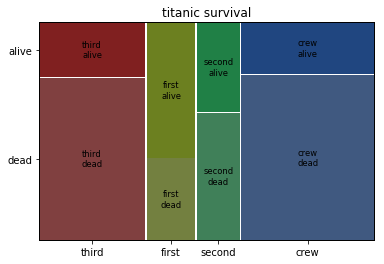

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

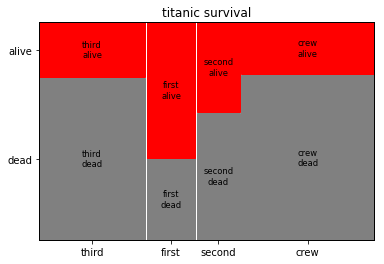

In [24]:
# slightly easier to read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

Let's take a look at the "expected" values for each cell.  That is,
the values that we would expect if there was no effect of "passtype" on "status".  To do this, let's take a look at the marginal totals:

In [25]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


The **expected** value for each cell (i.e. the value that you would expect if there was no interaction between passtype and status in this dataset) can be calculated by taking the row total multiplied by the column total and divided by the overall total.  

So we would get the following expected value for alive crew:

In [26]:
exp = ct['All'].loc['first'] * ct['alive'].loc['All'] / ct['All'].loc['All']

In [27]:
exp

104.98636983189459

You could repeat this for each cell (or write code to do so), but you get the idea.

## Let's talk about $ \chi^2 $



Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

Our null hypothesis is that there is no difference in survivorship based on passage type.

Here's a video resource that explains chi-squared:

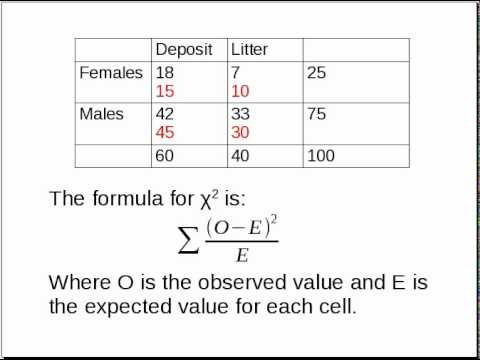

In [28]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("VskmMgXmkMQ")
display(vid)

In [29]:
ct = pd.crosstab(titanic.passtype, titanic.status, margins=False)

In [30]:
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


In [31]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  190.4011036168333
p-val =  4.999927529867932e-41
degree of freedom =  3


As a bonus, we also get a DataFrame of the expected values:

In [32]:
pd.DataFrame(expected)

,0,1
0,285.885961,599.114039
1,104.986370,220.013630
2,92.064970,192.935030
3,228.062699,477.937301


## Let's apply these ideas to another dataset

For this component, we'll use the Comic Characters data set:

In [33]:
comic_characters = pd.read_csv("https://raw.githubusercontent.com/umsi-data-science/data/main/comic_characters.csv", index_col="id")
comic_characters.head()

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962
2,Marvel,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,"1941, March",March,1941.0,3/1/1941
3,Marvel,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,"1974, October",October,1974.0,10/1/1974
4,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,"1963, March",March,1963.0,3/1/1963
5,Marvel,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,"1950, November",November,1950.0,11/1/1950


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

In [34]:
comic_characters.groupby(['Identity','publisher'])['appearances'].mean().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


Alternatively, we can use .pivot_table(). For example:

In [35]:
avg_appearance_per_identity = comic_characters.pivot_table(index='Identity', 
                                                          columns='publisher', 
                                                          values='appearances',
                                                          aggfunc='mean')
avg_appearance_per_identity.fillna(0).head()

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

### Let's warm up with a few groupby and pivot_table exercises:

What is the total number of appearances of characters for each publisher?

In [36]:
a = comic_characters.groupby('publisher')[['appearances']].sum()
a.head()

,appearances
publisher,
DC,154532.0
Marvel,260270.0


What is the total number of appearances of characters by each publisher in each year? Output a table.

In [37]:
b = comic_characters.groupby(['year','publisher']).sum().fillna(0)
b

appearances
year   publisher             
1935.0 DC               125.0
1936.0 DC               240.0
1937.0 DC               458.0
1938.0 DC              1639.0
1939.0 DC              4067.0
...                       ...
2011.0 Marvel          1890.0
2012.0 DC                17.0
       Marvel          1072.0
2013.0 DC                 1.0
       Marvel          1177.0

[154 rows x 1 columns]

### Can we improve that output?

Try unstacking it...

In [38]:
b = comic_characters.groupby(['year','publisher']).sum().unstack().fillna(0)
b.head(10)

appearances        
publisher          DC  Marvel
year                         
1935.0          125.0     0.0
1936.0          240.0     0.0
1937.0          458.0     0.0
1938.0         1639.0     0.0
1939.0         4067.0  1013.0
1940.0         9123.0  2160.0
1941.0         6945.0  5371.0
1942.0         4068.0   401.0
1943.0         1475.0   541.0
1944.0          274.0   960.0

Construct a contingency table of sex and character alignment normalized by all values.

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

In [39]:
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


In [40]:
ct = pd.crosstab(comic_characters['sex'], comic_characters['align'], normalize='all')
#ct
ct.apply(lambda x: x.apply(lambda y:  str('{:,.2f}'.format(y*100)) + '%' ))

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.10%,0.05%,0.07%,0.00%
Female Characters,8.22%,13.01%,4.37%,0.01%
Genderfluid Characters,0.00%,0.01%,0.01%,0.00%
Genderless Characters,0.06%,0.03%,0.02%,0.00%
Male Characters,39.51%,25.13%,9.40%,0.01%
Transgender Characters,0.01%,0.00%,0.00%,0.00%


### <font color="magenta">Q3: Create a mosaic plot of align and alive.  Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

In [47]:
ct = pd.crosstab(comic_characters['align'], comic_characters['alive'], margins=False)

alive               Deceased Characters  Living Characters
align                                                     
Bad Characters                     2732               6882
Good Characters                    1513               5954
Neutral Characters                  635               2138
Reformed Criminals                    1                  2
chi2 =  155.7767360980558
p-val =  1.4943918171359524e-33
degree of freedom =  3


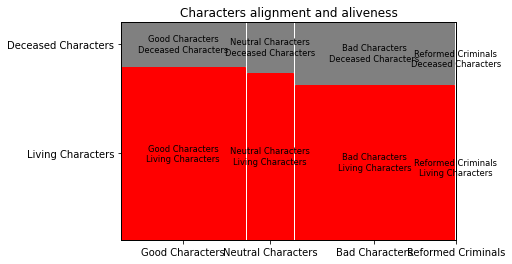

In [51]:
props = lambda key: {'color': 'r' if 'Living Characters' in key else 'gray'}
c = mosaic(comic_characters, ['align','alive'],title='Characters alignment and aliveness',properties=props)

In [48]:
chi2, p, dof, expected = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  155.7767360980558
p-val =  1.4943918171359524e-33
degree of freedom =  3


* Null hypothesis: There is no statiscally significant difference between the aliveness of the character given their alignment.
* Alternative hypothesis: There is statiscally significant difference between the aliveness of the characters given their alignment.\
From the p-value, which can be viewed as 0, we can reject the null hypothesis that there is no statiscally significant difference the aliveness of the character given their alignment, and in favor the alternative hypothesis that there is statiscally significant difference between the aliveness of the characters given their alignment.\
To be more specific, the good characters tend to have a high survival rate than the bad ones.

Insert your interpretation here.

# BREAK!

# Text Processing I: Basics and Regular Expressions

As usual, let's load up some data:

In [52]:
import pandas as pd

In [53]:
reviews = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/amazon_food_reviews.zip')

Let's take a really small sample, just so we can experiment with the various 

In [54]:
reviews_sample = reviews.head(10)

In [55]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


Let's review some basic string functionality from Pandas that can be applied to any Series or Index:

In [56]:
reviews_sample.ProfileName.str.lower()

0                         delmartian
1                             dll pa
2    natalia corres "natalia corres"
3                               karl
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
7                 pamela g. williams
8                           r. james
9                      carol a. reed
Name: ProfileName, dtype: object

In [57]:
reviews_sample.ProfileName.str.upper()

0                         DELMARTIAN
1                             DLL PA
2    NATALIA CORRES "NATALIA CORRES"
3                               KARL
4      MICHAEL D. BIGHAM "M. WASSIR"
5                     TWOAPENNYTHING
6                  DAVID C. SULLIVAN
7                 PAMELA G. WILLIAMS
8                           R. JAMES
9                      CAROL A. REED
Name: ProfileName, dtype: object

In [58]:
reviews_sample.Summary.str.len()

0    21
1    17
2    21
3    14
4    11
5    10
6    45
7    22
8    10
9    16
Name: Summary, dtype: int64

Remember, the ```columns``` attribute of a DataFrame is an Index object, which means that we can use str operators on the column names:

In [59]:
reviews_sample.columns

Index(['Id', 'ProductId', 'User Id ', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [60]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [61]:
reviews_sample.columns.str.lower()

Index(['id', 'productid', 'user id ', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

Notice that the "User Id" column of the dataframe looks weird:  it has a space in the middle *and* at the end.  Columns that are named like that will invariable trip us up in downstream (i.e. later) analyses, so it's wise to correct them now.  Something like the following can help:

In [62]:
reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

Index(['id', 'productid', 'user_id', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

And we can assign that back to the columns attribute to actually rename the columns:


In [63]:
reviews_sample.columns = reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

In [64]:
reviews_sample

,id,productid,user_id,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Splitting and Replacing Strings

Sometimes, we want to split strings into lists.  We might want to do that with the "summary" column:

In [65]:
reviews_sample.productid.head()

0    B001E4KFG0
1    B00813GRG4
2    B000LQOCH0
3    B000UA0QIQ
4    B006K2ZZ7K
Name: productid, dtype: object

In [66]:
reviews_sample.productid.str.split('00')

0    [B, 1E4KFG0]
1    [B, 813GRG4]
2    [B, 0LQOCH0]
3    [B, 0UA0QIQ]
4    [B, 6K2ZZ7K]
5    [B, 6K2ZZ7K]
6    [B, 6K2ZZ7K]
7    [B, 6K2ZZ7K]
8    [B, 0E7L2R4]
9    [B, 171APVA]
Name: productid, dtype: object

In [67]:
reviews_sample.productid.str.split('00').str.get(1)

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

Equivalently:

In [68]:
reviews_sample.productid.str.split('00').str[1]

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

### Replace (regex time!)

In [69]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [71]:
reviews_sample.summary.str.lower().str.replace('dog','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

In [73]:
reviews_sample.summary.str.lower().str.replace('Chris|Sam|Sidra|Ye Chan','_SOMETHING_')

C:\Users\kaiya\AppData\Local\Temp/ipykernel_38404/72585367.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_sample.summary.str.lower().str.replace('Chris|Sam|Sidra|Ye Chan','_SOMETHING_')


0                            good quality dog food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                                 healthy dog food
Name: summary, dtype: object

### Extracting Substrings

In [74]:
reviews_sample.summary.head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [75]:
reviews_sample.summary.str.extract(r'(Dog)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,Dog


In [76]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [77]:
reviews_sample.summary.str.extract(r'(Dog|Taffy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,Taffy
6,NaN
7,NaN
8,NaN
9,Dog


In [78]:
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,taffy
5,Taffy
6,NaN
7,taffy
8,NaN
9,Dog


In [79]:
# returns a Series
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)', expand = False)

0      Dog
1      NaN
2      NaN
3      NaN
4    taffy
5    Taffy
6      NaN
7    taffy
8      NaN
9      Dog
Name: summary, dtype: object

In [80]:
reviews_sample.summary.str.extractall(r'(Dog|[Tt]affy)')

,,0
,match,
0,0,Dog
4,0,taffy
5,0,Taffy
7,0,taffy
9,0,Dog


In [81]:
reviews_sample.summary

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: summary, dtype: object

In [82]:
reviews_sample.summary.str.extractall(r'(a)')

0
  match   
0 0      a
1 0      a
2 0      a
  1      a
4 0      a
  1      a
5 0      a
6 0      a
  1      a
  2      a
  3      a
7 0      a
  1      a
8 0      a
  1      a
9 0      a

### Testing for Strings that Match or Contain a Pattern

In [83]:
reviews_sample.text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [84]:
pattern = r'[Gg]ood'

In [85]:
reviews_sample.text.str.contains(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

In [86]:
reviews_sample.text.str.match(pattern)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

In [87]:
pattern = r'.*[Gg]ood.*'

In [88]:
reviews_sample.text.str.match(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

#### Helpful resources:
- Pandas text documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Regex Cheat Sheet: https://regexr.com/

### <font color="magenta">Q4: How many rows from the Amazon Food Reviews data set contain the word ```vegan``` in the  ```Text``` column?</font>

In [98]:
reviews.Text.str.contains(r'vegan').sum()

491

### <font color="magenta">Q5: How many rows from the Amazon Food Reviews data set contain HTML tags in the ```Text``` column?</font>
Hint: here's how to find an HTML tag: https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas.  Explain what the regex means.

In [118]:
reviews.Text.str.contains('<[^<]+?>').sum()

26575

* < means match charater <
* [^<] means match any charater except <
* \+ means doing the match one or more times
* ? means doing the match one or zero time, so use them together means doing the match for only one time
* \> means mathc charater \>\
In all, the regex means find anything except < containing in <>.

### <font color="magenta">  Stretch: Remove all HTML tags from the Amazon Food Reviews text column and save the results to a column called text_no_html.

In [123]:
reviews['text_no_html'] = reviews.Text.str.replace('<[^<]+?>',' ', regex=True)